In [1]:
import random
import mlrose
import sys
import numpy as np
import time
print(sys.version)

3.7.0 (v3.7.0:1bf9cc5093, Jun 27 2018, 04:59:51) [MSC v.1914 64 bit (AMD64)]


In [2]:
answers = {
    'genetic_algorithm': [],
    'simulated_annealing': [],
    'random_hill_climbing': [],
    'MIMIC': []
}

for x in [10, 20, 30, 40, 50]:
    def generate_knapsack(size):
        capacity = 0.6
        np.random.seed(42)
        weights = np.array(sorted(np.random.randint(10, 90, size=size)))
        values = [np.random.randint(int(weight/2), weight) for weight in weights]
#         items = np.random.randint(10, 90, size=(size,2))
# #         items = sorted(items, key=lambda x: x[0])
# #         items = np.array([list(i) for i in items])
#         weights, values = items[:,0], items[:, 1]

        print(weights, values)
        print(np.sum(weights), np.sum(weights)*capacity)

        max_weight_pct=capacity

        fitness = mlrose.Knapsack(weights, values, max_weight_pct)

        return fitness, weights, values

    fitness, weights, values = generate_knapsack(x)
    #print(fitness.evaluate(state))
    np.random.seed(42)
    problem = mlrose.DiscreteOpt(length = x, 
                                 fitness_fn = fitness, 
                                 maximize = True, 
                                 max_val = 3)

    # np.random.seed(42)
    start = time.time()
    best_state, best_fitness, iters = mlrose.genetic_alg(problem, pop_size=500, mutation_prob = 0.2, max_attempts = 500)
    end = time.time()
    answers['genetic_algorithm'].append((best_state, best_fitness, end-start, iters))

    print('genetic algorithm')
    print(np.dot(best_state, weights), 'weight capacity')
    print(np.dot(best_state, values), 'value')

    #np.random.seed(42)
    init_state = np.random.randint(0, 2, size=x)

    schedule = mlrose.ExpDecay(init_temp=1, exp_const=0.95, min_temp=0.001)
    start = time.time()
    best_state, best_fitness, iters = mlrose.simulated_annealing(problem, schedule = schedule,
                                                          max_attempts = 20,
                                                          init_state = init_state)
    end = time.time()
    answers['simulated_annealing'].append((best_state, best_fitness, end-start, iters))
    print('simulated_annealing')
    print(np.dot(best_state, weights), 'weight capacity')
    print(np.dot(best_state, values), 'value')

    start = time.time()
    best_state, best_fitness, iters = mlrose.random_hill_climb(problem, max_attempts = 300, restarts=20,
                                                          init_state = init_state)
    end = time.time()
    answers['random_hill_climbing'].append((best_state, best_fitness, end-start, iters))
    print('random_hill_climbing')
    print(np.dot(best_state, weights), 'weight capacity')
    print(np.dot(best_state, values), 'value')

    start = time.time()
    best_state, best_fitness, iters = mlrose.mimic(problem, pop_size=500, keep_pct = 0.2, max_attempts = 500)
    end = time.time()
    answers['MIMIC'].append((best_state, best_fitness, end-start, iters))
    print('mimic')
    print(np.dot(best_state, weights))
    print(np.dot(best_state, values))

[12 24 30 31 33 61 70 81 84 84] [10, 13, 22, 26, 21, 31, 55, 72, 53, 63]
510 306.0
genetic algorithm
306 weight capacity
261 value
simulated_annealing
296 weight capacity
233 value
random_hill_climbing
301 weight capacity
235 value


C:\Users\jonathanbe\HomeWork2-gatech\mlrose\algorithms.py:243: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


mimic
304
253
[11 11 12 24 30 30 31 33 39 42 47 61 62 69 70 73 81 84 84 85] [6, 10, 10, 23, 23, 15, 25, 25, 34, 35, 37, 59, 49, 36, 41, 56, 48, 80, 59, 45]
979 587.4
genetic algorithm
587 weight capacity
529 value
simulated_annealing
577 weight capacity
449 value
random_hill_climbing
584 weight capacity
474 value
mimic
585
497
[11 11 12 24 24 30 30 31 31 33 39 42 47 51 58 61 62 67 68 69 69 70 71 71
 73 81 84 84 85 89] [10, 7, 9, 18, 15, 23, 17, 19, 17, 22, 27, 27, 40, 28, 53, 57, 44, 41, 59, 35, 53, 62, 41, 42, 70, 53, 58, 77, 81, 47]
1578 946.8
genetic algorithm
942 weight capacity
812 value
simulated_annealing
931 weight capacity
677 value
random_hill_climbing
946 weight capacity
706 value
mimic
939
742


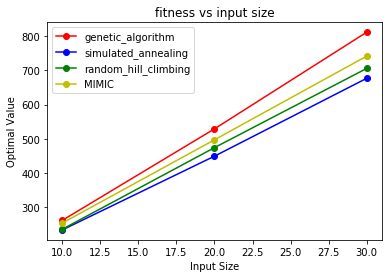

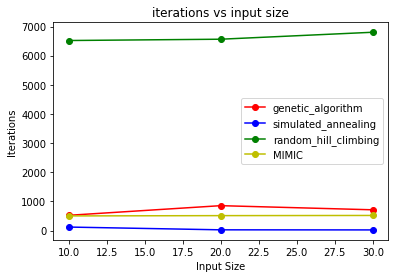

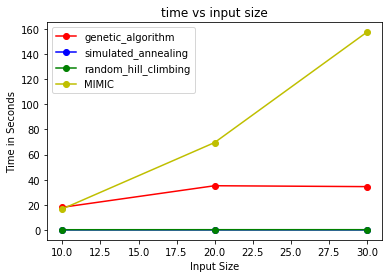

In [4]:
import matplotlib.pyplot as plt

colors = ['r', 'b', 'g', 'y']
j = 0
fig, ax = plt.subplots()
ax.set_title('fitness vs input size')
for key, value in answers.items():
    fitness = [x[1] for x in value]
    ax.plot([10, 20, 30, 40, 50], fitness, marker='o', color=colors[j], label=key)
    j=j+1
    
plt.xlabel('Input Size')
plt.ylabel('Optimal Value')
plt.legend()
plt.savefig('InputOptimal_3_60')

fig, ax = plt.subplots()
ax.set_title('iterations vs input size')
j=0
for key, value in answers.items():
    iters = [x[3] for x in value]
    ax.plot([10, 20, 30, 40, 50], iters, marker='o', color=colors[j], label=key)
    j=j+1
    
plt.xlabel('Input Size')
plt.ylabel('Iterations')
plt.legend()
plt.savefig('InputOptimal_3_60')



j = 0
fig, ax = plt.subplots()
ax.set_title('time vs input size')
for key, value in answers.items():
    times = [x[2] for x in value]
    ax.plot([10, 20, 30, 40, 50], times, marker='o', color=colors[j], label=key)
    j=j+1
    
plt.xlabel('Input Size')
plt.ylabel('Time in Seconds')
plt.legend()
plt.savefig('InputOptimal_3_60')

In [ ]:
import networkx

graph = networkx.connected_watts_strogatz_graph(9, 3, 0.5, 5)
edges = graph.edges

In [ ]:
import matplotlib.pyplot as plt


colors_of_nodes = networkx.greedy_color(graph)
networkx.draw_shell(graph, node_color= 'red')
plt.show()

In [ ]:
graph_answers = {
    'genetic_algorithm': {
        2: [],
        3: [],
        4: [],
        5: [],
        6: []
    },
    'simulated_annealing': {
        2: [],
        3: [],
        4: [],
        5: [],
        6: []
    },
    'random_hill_climbing': {
        2: [],
        3: [],
        4: [],
        5: [],
        6: []
    },
    'MIMIC': {
        2: [],
        3: [],
        4: [],
        5: [],
        6: []
    }
}

for x in [9, 16, 25, 36, 49]:
    for k in range(2, min(x, 7)):
        graph = networkx.connected_watts_strogatz_graph(x, k, 0.5, 5)
        edges = graph.edges
        fitness = mlrose.MaxKColor(edges)
        
        current_fitness = 1
        
        np.random.seed(42)
        problem = mlrose.DiscreteOpt(length = x, 
                                     fitness_fn = fitness, 
                                     maximize = True, 
                                     max_val = k)

        np.random.seed(42)
        start = time.time()
        best_state, best_fitness, iters = mlrose.genetic_alg(problem, 
                                                             mutation_prob = 0.2, 
                                                             max_attempts = 20, 
                                                             pop_size=500)
        end = time.time()
        # networkx.draw(graph, node_color=best_state)
        plt.show()
        graph_answers['genetic_algorithm'][k].append((best_state, best_fitness, end-start, iters))
        print('genetic_algorithm', best_state, best_fitness, end-start)

        np.random.seed(42)
        init_state = np.random.randint(0,k-1, size=x)

        schedule = mlrose.ExpDecay(init_temp=1, exp_const=0.5, min_temp=0.1)
        start = time.time()
        best_state, best_fitness, iters = mlrose.simulated_annealing(problem, schedule = schedule,
                                                              max_attempts = 50, max_iters = 5000,
                                                              init_state = init_state)
        end = time.time()
        # networkx.draw_shell(graph, node_color=best_state)
        plt.show()
        graph_answers['simulated_annealing'][k].append((best_state, best_fitness, end-start, iters))
        print('simulated_annealing', best_state, best_fitness, end-start)

        np.random.seed(42)
        init_state = np.random.randint(0,k-1, size=x)

        start = time.time()
        best_state, best_fitness, iters = mlrose.random_hill_climb(problem, 
                                                                   max_attempts = 100, 
                                                                   restarts=50,
                                                                   max_iters = 200,
                                                              init_state = init_state)
        end = time.time()
        # networkx.draw(graph, node_color=best_state)
        plt.show()
        graph_answers['random_hill_climbing'][k].append((best_state, best_fitness, end-start, iters))
        print('random_hill_climbing', best_state, best_fitness, end-start)

        start = time.time()
        best_state, best_fitness, iters = mlrose.mimic(problem, pop_size=500, keep_pct = 0.5, max_attempts = 20)
        end = time.time()
        # networkx.draw(graph, node_color=best_state)
        plt.show()
        graph_answers['MIMIC'][k].append((best_state, best_fitness, end-start, iters))
        print('MIMIC', best_state, best_fitness, end-start)

In [ ]:
def myfun(x):
    print (x)
    return x[1] == 0

def filter_smallest_fitness(enumerable_fitness):
     # another filter needs to be applied
#     print(enumerable_fitness)
    answered_in = {
        2: [],
        3: [],
        4: [],
        5: [],
        6: []
    }
    for key, value in enumerable_fitness: #key is K
        #print(key, value)
        current_size = 0
        while value[current_size][1] == 0:
            answered_in[key].append((current_size, value[current_size][2]))
            current_size += 1
            if current_size == 5:
                break
        
        
    
    return answered_in

for algorithm in graph_answers.keys():
    answers_ = filter_smallest_fitness(graph_answers[algorithm].items())
    filled = 0
    min_time = {
        2: 60.0,
        3: 60.0,
        4: 60.0, 
        5: 60.0, 
        6: 60.0
    }
    min_value = {
        9: 6.0,
        16: 6.0,
        25: 6.0, 
        36: 6.0, 
        49: 6.0
    }
    for K, answers in answers_.items():
        for tups in answers:
            k, times = tups
            if (k == filled):
                min_value[(filled+3)**2] = K
                min_time[filled+2] = times
                filled += 1
    print(algorithm, min_time, min_value)
    plt.plot(min_value.keys(), min_time.values(), marker='o', label=algorithm)

plt.xlabel('Input Size')
plt.ylabel('time to find K')
plt.title('Time vs input size')
plt.legend()
plt.savefig('MaxKTime')

In [ ]:
import matplotlib.pyplot as plt

answers_iters = {
    'genetic_algorithm': genetic_iters,
    'simulated_annealing': simulated_iters,
    'random_hill_climbing': random_iters,
    'MIMIC': mimic_iters
}

colors = ['r', 'b', 'g', 'y']
j = 0
fig, ax = plt.subplots()
ax.set_title('fitness vs input size')
for key, value in answers.items():
    print(key, [x[1] for x in value])
    fitness = [x[1] for x in value]
    ax.plot([10, 20, 30, 40, 50], fitness, marker='o', color=colors[j], label=key)
    j=j+1
    
plt.xlabel('Input Size')
plt.ylabel('Optimal Value')
plt.legend()
plt.savefig('InputOptimal_3_60')

fig, ax = plt.subplots()
ax.set_title('iterations vs input size')
j=0
for key, value in answers_iters.items():
    ax.plot([10, 20, 30, 40, 50], value, marker='o', color=colors[j], label=key)
    j=j+1
    
plt.xlabel('Input Size')
plt.ylabel('Iterations')
plt.legend()
plt.savefig('InputIteration_3_60')



j = 0
fig, ax = plt.subplots()
ax.set_title('time vs input size')
for key, value in answers.items():
    times = [x[2] for x in value]
    ax.plot([10, 20, 30, 40, 50], times, marker='o', color=colors[j], label=key)
    j=j+1
    
plt.xlabel('Input Size')
plt.ylabel('Time in Seconds')
plt.legend()
plt.savefig('InputTime_3_60')


In [ ]:
answers_four = {
    'genetic_algorithm': [],
    'simulated_annealing': [],
    'random_hill_climbing': [],
    'MIMIC': []
}

for size in [10, 20, 30, 40, 50]:
    fitness = mlrose.FourPeaks(t_pct=0.15)

    np.random.seed(42)
    problem = mlrose.DiscreteOpt(length = size, 
                                 fitness_fn = fitness, 
                                 maximize = True, 
                                 max_val = 2)

    # np.random.seed(42)
    start = time.time()
    best_state, best_fitness, iters = mlrose.genetic_alg(problem, pop_size=500, mutation_prob = 0.1, max_attempts = 20)
    end = time.time()
    print('genetic_algorithm')
    answers_four['genetic_algorithm'].append((best_state, best_fitness, end-start, iters))
    print(best_state, best_fitness)

    #np.random.seed(42)
    init_state = np.random.randint(0,1, size=size)

    schedule = mlrose.ExpDecay(init_temp=1, exp_const=0.95, min_temp=0.1)
    start = time.time()
    best_state, best_fitness, iters = mlrose.simulated_annealing(problem, schedule = schedule,
                                                          max_attempts = 2000,
                                                          init_state = init_state)
    end = time.time()
    print('simulated_annealing')
    answers_four['simulated_annealing'].append((best_state, best_fitness, end-start, iters))
    print(best_state, best_fitness)


    start = time.time()
    best_state, best_fitness, iters = mlrose.random_hill_climb(problem, max_attempts = 2000, restarts=20,
                                                          init_state = init_state)
    end = time.time()

    print('random_hill_climbing')
    answers_four['random_hill_climbing'].append((best_state, best_fitness, end-start, iters))
    print(best_state, best_fitness)

    start = time.time()
    best_state, best_fitness, iters = mlrose.mimic(problem, pop_size=500, keep_pct = 0.1, max_attempts = 20)

    end = time.time()
    print('mimic')
    answers_four['MIMIC'].append((best_state, best_fitness, end-start, iters))
    print(best_state, best_fitness)

In [ ]:

colors = ['r', 'b', 'g', 'y']
j = 0
fig, ax = plt.subplots()
ax.set_title('fitness vs input size')
for key, value in answers_four.items():
    fitness = [x[1] for x in value]
    ax.plot([10, 20, 30, 40, 50], fitness, marker='o', color=colors[j], label=key)
    j=j+1
    
plt.xlabel('Input Size')
plt.ylabel('Optimal Value')
plt.legend()
plt.savefig('InputOptimal_4')

fig, ax = plt.subplots()
ax.set_title('iterations vs input size')
j=0
for key, value in answers_four.items():
    iters = [x[3] for x in value]
    ax.plot([10, 20, 30, 40, 50], iters, marker='o', color=colors[j], label=key)
    j=j+1
    
plt.xlabel('Input Size')
plt.ylabel('Iterations')
plt.legend()
plt.savefig('InputIteration_4')



j = 0
fig, ax = plt.subplots()
ax.set_title('time vs input size')
for key, value in answers_four.items():
    times = [x[2] for x in value]
    ax.plot([10, 20, 30, 40, 50], times, marker='o', color=colors[j], label=key)
    j=j+1
    
plt.xlabel('Input Size')
plt.ylabel('Time in Seconds')
plt.legend()
plt.savefig('InputTime_4')

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from functools import reduce
from sklearn.metrics import accuracy_score, classification_report


"""
MODEL: INPUTS -> 12 hidden units -> 8 hidden units -> 1 output


def create_model(input_dim):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
"""

def preprocess_heart_data(heart):
    chest_pains = pd.get_dummies(heart.cp, prefix='cp')
    slopes = pd.get_dummies(heart.slope, prefix='slope')
    major_vessels = pd.get_dummies(heart.ca, prefix='ca')
    thals = pd.get_dummies(heart.thal, prefix='thals')

    processed_csv = [
        chest_pains,
        slopes,
        major_vessels,
        thals,
        heart[['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak']],
        pd.DataFrame(heart.target)
    ]

    df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), processed_csv)

    # scaling
    norm_columns = ['age', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak']

    scalers = {name: MinMaxScaler() for name in norm_columns}

    for names in norm_columns:
        df_final[names] = scalers[names].fit_transform(df_final[[names]])
        
    return df_final, scalers

answers_nn = {
    'genetic_algorithm': [],
    'simulated_annealing': [],
    'random_hill_climbing': []
}

heart = pd.read_csv('./heart-prediction/heart.csv')
heart_final, heart_scalers = preprocess_heart_data(heart)


X = heart_final.loc[:, heart_final.columns != 'target']
Y = heart_final.loc[:, heart_final.columns == 'target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# # Initialize neural network object and fit object
# np.random.seed(42)
for x in [0.0001, 0.001, 0.01, 0.1]:
    nn_model2 = mlrose.NeuralNetworkClassifier(hidden_nodes = [12, 8], activation = 'relu', \
                                     algorithm = 'random_hill_climb', max_iters = 5000, \
                                     bias = True, learning_rate = x, \
                                     early_stopping = True, clip_max = 5, max_attempts = 100)

    nn_model2.fit(X_train, y_train)
    
    y_test_pred = nn_model2.predict(X_test)
    answers_nn['random_hill_climbing'].append((X_test, y_test_pred, y_test))
    print('{classifer} \n {report}'.format(
                classifer='random_hill_climb | test', 
                report=classification_report(np.round(y_test_pred), y_test)
            ))

    y_train_pred = nn_model2.predict(X_train)

    print('{classifer} \n {report}'.format(
                classifer='random_hill_climb | train', 
                report=classification_report(np.round(y_train_pred), y_train)
            ))


    schedule = mlrose.ExpDecay()
    nn_model2 = mlrose.NeuralNetworkClassifier(hidden_nodes = [12, 8], schedule=schedule, activation = 'relu', \
                                     algorithm = 'simulated_annealing', max_iters = 5000, \
                                     bias = True, learning_rate = x, \
                                     early_stopping = True, clip_max = 5, max_attempts = 100)

    nn_model2.fit(X_train, y_train)

    y_test_pred = nn_model2.predict(X_test)
    answers_nn['simulated_annealing'].append((X_test, y_test_pred, y_test))
    print('{classifer} \n {report}'.format(
                classifer='simulated_annealing | test', 
                report=classification_report(np.round(y_test_pred), y_test)
            ))

    y_train_pred = nn_model2.predict(X_train)

    print('{classifer} \n {report}'.format(
                classifer='simulated_annealing | train', 
                report=classification_report(np.round(y_train_pred), y_train)
            ))

    np.seterr(all='ignore')
#     np.random.seed(42)
#     nn_model2 = mlrose.NeuralNetworkClassifier(hidden_nodes = [12, 8], activation = 'relu', \
#                                      algorithm = 'genetic_alg', pop_size=500, mutation_prob=0.35, \
#                                      bias = True, learning_rate = x, clip_max = 5, max_attempts = 500)



#     nn_model2.fit(X_train, y_train)

#     y_test_pred = nn_model2.predict(X_test)
#     answers_nn['genetic_algorithm'].append((X_test, y_test_pred, y_test))
#     print('{classifer} \n {report}'.format(
#                 classifer='genetic_alg | test', 
#                 report=classification_report(np.round(y_test_pred), y_test)
#             ))

#     y_train_pred = nn_model2.predict(X_train)

#     print('{classifer} \n {report}'.format(
#                 classifer='genetic_alg | train', 
#                 report=classification_report(np.round(y_train_pred), y_train)
#             ))


In [ ]:
for x in [0.2, 0.3, 0.35, 0.4]:
    np.seterr(all='ignore')
    np.random.seed(42)
    nn_model2 = mlrose.NeuralNetworkClassifier(hidden_nodes = [12, 8], activation = 'relu', \
                                     algorithm = 'genetic_alg', pop_size=500, mutation_prob=x, \
                                     bias = True, learning_rate = 0.0001, clip_max = 5, max_attempts = 500)



    nn_model2.fit(X_train, y_train)

    y_test_pred = nn_model2.predict(X_test)
    answers_nn['genetic_algorithm'].append((X_test, y_test_pred, y_test))

In [ ]:
import matplotlib.pyplot as plt

j = 0
colors = ['r', 'b', 'g']
for item in answers_nn.items():
    if item[0] != 'genetic_algorithm':
        accuracy = []
        for items, rate in zip(item[1], [0.0001, 0.001, 0.01, 0.1]):
            print(rate, accuracy_score(items[1], items[2]))
            accuracy.append(accuracy_score(items[1], items[2]))
        plt.plot(['0.0001', '0.001', '0.01', '0.1'], accuracy, marker='o', color=colors[j], label=item[0])
            
    j += 1

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy Score')   
plt.legend()
plt.savefig('learning_rate')

In [ ]:
j = 0
colors = ['r', 'b', 'g']
for item in answers_nn.items():
    if item[0] == 'genetic_algorithm':
        accuracy = []
        for items, rate in zip(item[1], [0.0001, 0.001, 0.01, 0.1]):
            print(rate, accuracy_score(items[1], items[2]))
            accuracy.append(accuracy_score(items[1], items[2]))

        plt.plot(['0.2', '0.3', '0.35', '0.4'], accuracy, marker='o', color=colors[j], label=item[0])
            
    j += 1
            
plt.xlabel('Mutation Rate')
plt.ylabel('Accuracy Score')
plt.legend()
plt.savefig('mutation')

In [ ]:
accuracy_score(answers_nn['simulated_annealing'][1][1], answers_nn['simulated_annealing'][1][2])

In [ ]:
answers_nn['simulated_annealing'][1]